In [1]:


from matplotlib import pyplot as plt


from sklearn.model_selection import train_test_split

import tensorflow

from tensorflow.keras import backend as K

from tensorflow.keras import models
from tensorflow.keras import layers

from tensorflow.keras.utils import to_categorical

import utils

# Image prediction

Correctly classify one of three classes with


- model from scratch
- pre-trained model

## Steps

- prepare data into X, y arrays
- train model from scratch
- write function that takes image(s) and outputs label
- write function that displays image and writes label + probs on image

In [2]:
path = "../00_data/"
categories = utils.os.listdir(path)

imgs = utils.read_imgs(path_base=path, dir_categories=categories)


In [3]:
type(imgs['X'])

numpy.ndarray

In [4]:
imgs['X'][1].shape

(224, 224, 3)

Text(150, 150, 'pen')

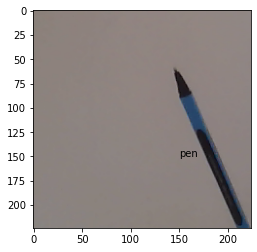

In [7]:
plt.imshow(imgs['X'][600]/255)
plt.text(150, 150, s = imgs['y'][600])

## Prep Model data

In [18]:
X_train, X_test, y_train, y_test = train_test_split(imgs['X'], imgs['y_label_numeric'], test_size=0.15)

## Model Development

CNN, few parameters

In [19]:
# Clear session before starting the model building
K.clear_session()


In [20]:

model = models.Sequential([
    
    # 1st Conv
    layers.Conv2D(
      filters=5,
      kernel_size=(10,10),
      strides=(2,2),
      padding="same",
      activation="relu",
      input_shape=(224, 224, 3)),
    # Pool
    layers.MaxPooling2D(pool_size=(3,3),
                # strides=(2,2),
                padding="same"),
    # 2nd Conv
    layers.Conv2D(
      filters=20,
        kernel_size=(5,5),
        strides=(1,1),
        padding="same",
        activation="relu"),
    # Pool
    layers.MaxPooling2D(pool_size=(3,3),
                  strides=(2,2),
                  padding="same"),
    
    # Flatten
    layers.Flatten(),
    # FC1
    layers.Dense(units=1000, activation="relu"),
    layers.Dropout(0.1),
    # FC2
    layers.Dense(units=250, activation="relu"),
    layers.Dropout(0.1),
    # Output layer
    layers.Dense(units=3, activation="softmax")
])



In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 112, 112, 5)       1505      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 38, 38, 5)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 38, 38, 20)        2520      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 19, 19, 20)        0         
_________________________________________________________________
flatten (Flatten)            (None, 7220)              0         
_________________________________________________________________
dense (Dense)                (None, 1000)              7221000   
_________________________________________________________________
dropout (Dropout)            (None, 1000)              0

In [22]:
model.compile(
    # loss function to optimize
    loss=tensorflow.keras.losses.CategoricalCrossentropy(),
    # evaluation metric
    metrics=['accuracy']
)

In [23]:
results = model.fit(
    X_train, to_categorical(y_train), 
    epochs=40, # number of iterations through the complete dataset            
    batch_size=int(10*10), # number of observations used when updating weights, gradient        
    validation_split=0.2, # 20% of the data is used for validation
    verbose =False
)

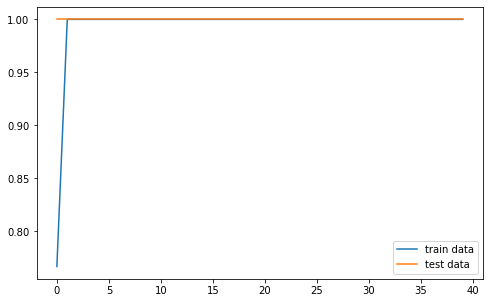

In [24]:
# plot the accuracy

# plot the validation accuracy

plt.rcParams["figure.figsize"] = [8, 5]
plt.plot(model.history.history["accuracy"], label="train data")
plt.plot(model.history.history["val_accuracy"], label="test data")
plt.legend();

In [ ]:
import sklearn.metrics._classification.conf

In [32]:
ypred = model.predict(X_test)
utils.np.argmax(ypred, axis=1)


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2])